In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('house_prices.csv')

In [3]:
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# *[A]* |DATA CLEANUP|

# 1. Drop columns that are obviously not useful in determining the house prices

In [4]:
df.drop(df.iloc[:, [0,1,4,7]], axis = 1, inplace = True)

In [5]:
# We have dopped the following columns:
# [0] Area_Type
# [1] Availability
# [4] Society
# [7] Balcony

# 2. Identify and cleanup NaN values

In [6]:
df.isnull().any()

location       True
size           True
total_sqft    False
bath           True
price         False
dtype: bool

In [7]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df.shape

(13320, 5)

In [9]:
# Our dataset has a size of 13,320 rows.
# Therefore, the total NaN-valued rows are = 90
# NaN makes up only 0.675% of the data set.

# So we can confidently drop these rows:

In [10]:
df.dropna(inplace = True)

In [11]:
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [12]:
df.isna().any()

location      False
size          False
total_sqft    False
bath          False
price         False
dtype: bool

In [13]:
# ^ No NaN columns left

# 3. Identify unique() values and cleanup if variations of the same information emerge

In [14]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [15]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
df['total_sqft'].unique()[:1000]

array(['1056', '2600', '1440', '1521', '1200', '1170', '2732', '3300',
       '1310', '1020', '1800', '2785', '1000', '1100', '2250', '1175',
       '1180', '1540', '2770', '600', '1755', '2800', '1767', '510',
       '1250', '660', '1610', '1151', '1025', '2100 - 2850', '1075',
       '1760', '1693', '1925', '700', '1070', '1724', '1290', '1143',
       '1296', '1254', '1330.74', '970', '1459', '800', '869', '1270',
       '1670', '2010', '1185', '1600', '1500', '1407', '840', '4395',
       '845', '5700', '1160', '3000', '1140', '1220', '1350', '1005',
       '500', '1358', '1569', '1240', '2089', '1206', '1150', '2511',
       '460', '4400', '1660', '1326', '1325', '1499', '1665', '708',
       '1060', '710', '1450', '2894', '1330', '2502', '650', '2400',
       '1007', '966', '1630', '1640', '782', '1260', '1413', '1116',
       '1530', '3700', '2497', '1436', '276', '1427', '2061',
       '3067 - 8156', '2650', '1282', '1050', '945', '950', '1870', '880',
       '1535', '1360', '1

In [17]:
df['bath'].unique()[:19]

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [18]:
df['price'].unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [19]:
# ---- 3.1 ---- #

In [20]:
# From the above we notice that 'Size' column has
# the same information in multiple variations
# Such as 2 Bedrooms repeated as 2 BHK

In [21]:
# Let's clean up the 'Size' column

In [22]:
# Tokenize the number and put them in a new column

In [23]:
df['Bedrooms'] = df['size'].apply( lambda i: int(i.split(' ')[0]))
# Split with ' ' and take the 1st element using [0]

In [24]:
df

,location,size,total_sqft,bath,price,Bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [25]:
# ^ 'Bedroom' appears as a new column
# Let's evaluate the unique bedrooms in it again

In [26]:
X_beds = df['Bedrooms'].unique()
sorted(X_beds)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 19, 27, 43]

In [27]:
X_beds = pd.DataFrame(X_beds)
X_beds.describe()

,0
count,19.000000
mean,12.000000
std,9.994443
min,1.000000
25%,5.500000
50%,10.000000
75%,15.000000
max,43.000000


In [28]:
# We notice we have an outlier here with a house that has 43 bedrooms.
# Let's explore this particular house more

In [29]:
df[df['Bedrooms'] == 43]

,location,size,total_sqft,bath,price,Bedrooms
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [30]:
# This house has 43 bedrooms but only 2400 sq.ft
# Therefore, this seems to be an accidental entry

In [31]:
# ---- 3.2 ---- #

In [32]:
# Let's explore the 'total_sqft' columns since it had ranges in it
# Such as: 1133 - 1384
# Let's eliminate such ranges by replacing it with their averages.

In [33]:
# Creating a function to return averages and in float values:

In [34]:
def sqft_float(j):
    
    Token = j.split('-')
    
    if len(Token) == 2:

        A = float(Token[0])
        B = float(Token[1])
        
        Avg = (A + B)/2
        return Avg
        
    
    try:
        return float(j)
    
    except:
        return None

In [35]:

df['Total_SqFt'] = df.total_sqft.apply(sqft_float)

In [36]:
df

,location,size,total_sqft,bath,price,Bedrooms,Total_SqFt
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5,3453.0
13316,Richards Town,4 BHK,3600,5.0,400.00,4,3600.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2,1141.0
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4,4689.0


# *[B]* |FEATURE ENGINEERING|

In [37]:
# Create a new column 'Price_USD' 

In [38]:
# Creating a new column of Price in USD:
df["Price_USD"] = ((df['price']*100000)/73.48).round(2)

In [39]:
df

,location,size,total_sqft,bath,price,Bedrooms,Total_SqFt,Price_USD
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0,53170.93
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0,163309.74
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0,84376.70
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0,129286.88
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0,69406.64
...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5,3453.0,314371.26
13316,Richards Town,4 BHK,3600,5.0,400.00,4,3600.0,544365.81
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2,1141.0,81654.87
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4,4689.0,664126.29


In [40]:
# Create Price Per Sq.ft in USD

In [41]:
df['Price_Per_SqFt_USD'] = df.Price_USD/df['Total_SqFt']

In [42]:
df

,location,size,total_sqft,bath,price,Bedrooms,Total_SqFt,Price_USD,Price_Per_SqFt_USD
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0,53170.93,50.351259
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0,163309.74,62.811438
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0,84376.70,58.594931
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0,129286.88,85.001236
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0,69406.64,57.838867
...,...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5,3453.0,314371.26,91.042937
13316,Richards Town,4 BHK,3600,5.0,400.00,4,3600.0,544365.81,151.212725
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2,1141.0,81654.87,71.564303
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4,4689.0,664126.29,141.634952


In [43]:
df.drop(['total_sqft', 'size'], axis = 1, inplace = True)

In [44]:
df

,location,bath,price,Bedrooms,Total_SqFt,Price_USD,Price_Per_SqFt_USD
0,Electronic City Phase II,2.0,39.07,2,1056.0,53170.93,50.351259
1,Chikka Tirupathi,5.0,120.00,4,2600.0,163309.74,62.811438
2,Uttarahalli,2.0,62.00,3,1440.0,84376.70,58.594931
3,Lingadheeranahalli,3.0,95.00,3,1521.0,129286.88,85.001236
4,Kothanur,2.0,51.00,2,1200.0,69406.64,57.838867
...,...,...,...,...,...,...,...
13315,Whitefield,4.0,231.00,5,3453.0,314371.26,91.042937
13316,Richards Town,5.0,400.00,4,3600.0,544365.81,151.212725
13317,Raja Rajeshwari Nagar,2.0,60.00,2,1141.0,81654.87,71.564303
13318,Padmanabhanagar,4.0,488.00,4,4689.0,664126.29,141.634952


In [45]:
# Check rows by location now

In [46]:
len(df.location.unique())

1304

In [47]:
# Since location are categorical we would need to convert them into 
# one-hot-encoding values. But! 1304 values will bring us to the curse
# of dimensionality. 

In [48]:
# Let's first see how many locations 
# have the most amount of properties
# in this dataset.

In [49]:
df['location'] = df.location.apply(lambda i: i.strip())
# Removes unncessary space in Locations

In [50]:
Location_and_Properties = df.groupby('location')['location'].agg('count').sort_values(ascending = False)
Location_and_Properties

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [51]:
len(Location_and_Properties[Location_and_Properties <= 10])

1052

In [52]:
# Create new variable for properties less than 11

Location_with_less_than_11 = Location_and_Properties[Location_and_Properties <= 10]

In [53]:
# We identify 1052 locations that have less than 11 properties
# Therefore, we can rename these locations as 'Others' to 
# make our data less complex when we apply one hot encoding

In [54]:
#df['location'] = df.location.apply(lambda i: 'other' if(i in Location_and_Properties) else i)
df.location = df.location.apply(lambda i: 'other' if i in Location_with_less_than_11 else i)

In [55]:
# ^ The above converts the Location with properties less than 11
# into 'other'

In [56]:
df

,location,bath,price,Bedrooms,Total_SqFt,Price_USD,Price_Per_SqFt_USD
0,Electronic City Phase II,2.0,39.07,2,1056.0,53170.93,50.351259
1,Chikka Tirupathi,5.0,120.00,4,2600.0,163309.74,62.811438
2,Uttarahalli,2.0,62.00,3,1440.0,84376.70,58.594931
3,Lingadheeranahalli,3.0,95.00,3,1521.0,129286.88,85.001236
4,Kothanur,2.0,51.00,2,1200.0,69406.64,57.838867
...,...,...,...,...,...,...,...
13315,Whitefield,4.0,231.00,5,3453.0,314371.26,91.042937
13316,other,5.0,400.00,4,3600.0,544365.81,151.212725
13317,Raja Rajeshwari Nagar,2.0,60.00,2,1141.0,81654.87,71.564303
13318,Padmanabhanagar,4.0,488.00,4,4689.0,664126.29,141.634952


In [57]:
len(df.location.unique())

242

In [58]:
# Now ^ We only have 242 unique locations

# *[C]* |Outlier Detection|

In [59]:
# We will use central limit theorem to eliminate the outliers
# We will go with 2-Standard_Deviations to calculate the outlier

In [60]:
# ----- C.1 [Remove low Square_Ft/Bedroom < 310 ] ----- #

In [61]:
Square_foot_per_bedroom = df.Total_SqFt/df.Bedrooms

In [62]:
Square_foot_per_bedroom.describe()

count    13200.000000
mean       573.847262
std        388.079980
min          0.250000
25%        473.000000
50%        552.000000
75%        625.000000
max      26136.000000
dtype: float64

In [63]:
# Average Square feet per bedroom is ~310 (according to the listings online)

In [64]:
# Lets drop apartments with SqFt/Bedroom < 310

In [65]:
df = df[~((df.Total_SqFt/df.Bedrooms) < 310)]

In [66]:
df.shape

(12306, 7)

In [67]:
# Now our data frame has let go of properties that had Sq.ft/bed
# less than 310

In [68]:
df.Price_Per_SqFt_USD.describe()

count    12260.000000
mean        84.490996
std         55.118060
min          3.644935
25%         57.158410
50%         71.627083
75%         92.858471
max       2401.613882
Name: Price_Per_SqFt_USD, dtype: float64

In [69]:
# ----- C.2 [Remove outliers of SqFt/Price] ----- #

In [70]:
# Know that in a normalized data 99.7% of data will lie within 3 SD

In [71]:
# Function to find data below and above Mean +- 3* SD:

In [72]:
def remove_outliers(df):
    
    # DataFrame our function will return
    CleanedUp_Data_Frame = pd.DataFrame()
    
    # Group the DataFrame by location
    Df_per_location = df.groupby('location')
    
    for index, new_DataFrame in Df_per_location:
        
        Mean_per_location_of_PricePerSqFt = np.mean(new_DataFrame.Price_Per_SqFt_USD)
        STD_per_location_of_PricePerSqFt = np.std(new_DataFrame.Price_Per_SqFt_USD)
        
        # Let's create Upper and Lower bound for Mean +- SD
        Upper_Bound = Mean_per_location_of_PricePerSqFt + 1*STD_per_location_of_PricePerSqFt
        Lower_Bound = Mean_per_location_of_PricePerSqFt - 1*STD_per_location_of_PricePerSqFt
        
        # Populate the Cleaned Up DataFrame
        DataFrame_within_one_SD = new_DataFrame[ ((new_DataFrame.Price_Per_SqFt_USD) <= Upper_Bound) & 
                                             ((new_DataFrame.Price_Per_SqFt_USD) >= Lower_Bound)]
        
        CleanedUp_Data_Frame = pd.concat([CleanedUp_Data_Frame, DataFrame_within_one_SD],
                                        ignore_index = True)
    
    return CleanedUp_Data_Frame

In [73]:
df = remove_outliers(df)

In [74]:
df.shape

(10005, 7)

In [75]:
# The above steps have reduced our DataFrame to 10,005 rows

In [76]:
# ---------- #

In [77]:
# ----- C.3 [Remove apartments with 3 bedroom Price < 2 Bed price in same location] ----- #

In [78]:
def Bedroom_Outliers(df):
    
    # Index arrays which we will drop from the DataFrame
    index_numbers_to_drop = np.array([])
    
    # Group the DataFrame by location
    Df_per_location = df.groupby('location')
    
    # Run for loop per location 
    for index, location_df in Df_per_location:
        
        dictionary_of_apartments_per_bed_Mean = {}
        
        # Group the DataFrame by location
        Df_per_location_per_bed = location_df.groupby('Bedrooms')
        
        # For loop to populate the dictionary of Apartments_Per_Bedroom
        for bedrooms, bedroom_df in Df_per_location_per_bed:
            
            dictionary_of_apartments_per_bed_Mean[bedrooms] = {
                'mean' : np.mean(bedroom_df.Price_Per_SqFt_USD)
            }
        
        for bedrooms, bedroom_df in Df_per_location_per_bed:
                Compare = dictionary_of_apartments_per_bed_Mean.get(bedrooms - 1)

                if Compare:
                    outliers = bedroom_df[bedroom_df.Price_Per_SqFt_USD < (Compare['mean'])].index.values
                    index_numbers_to_drop = np.append(index_numbers_to_drop, outliers)

    return (df.drop(index_numbers_to_drop, axis = 'index'))
            

In [79]:
df_A = Bedroom_Outliers(df)

In [80]:
df_A

,location,bath,price,Bedrooms,Total_SqFt,Price_USD,Price_Per_SqFt_USD
0,1st Block Jayanagar,4.0,428.0,4,2850.0,582471.42,204.375937
2,1st Block Jayanagar,2.0,235.0,3,1875.0,319814.92,170.567957
4,1st Block Jayanagar,2.0,148.0,2,1235.0,201415.35,163.089352
5,1st Block Jayanagar,4.0,413.0,4,2750.0,562057.70,204.384618
6,1st Block Jayanagar,4.0,368.0,4,2450.0,500816.55,204.414918
...,...,...,...,...,...,...,...
9996,other,2.0,70.0,2,1200.0,95264.02,79.386683
9997,other,1.0,200.0,1,1800.0,272182.91,151.212728
10000,other,2.0,110.0,2,1353.0,149700.60,110.643459
10001,other,1.0,26.0,1,812.0,35383.78,43.576084


In [81]:
# Plotting a histogram of properties/SqFt

Text(0, 0.5, 'Frequency')

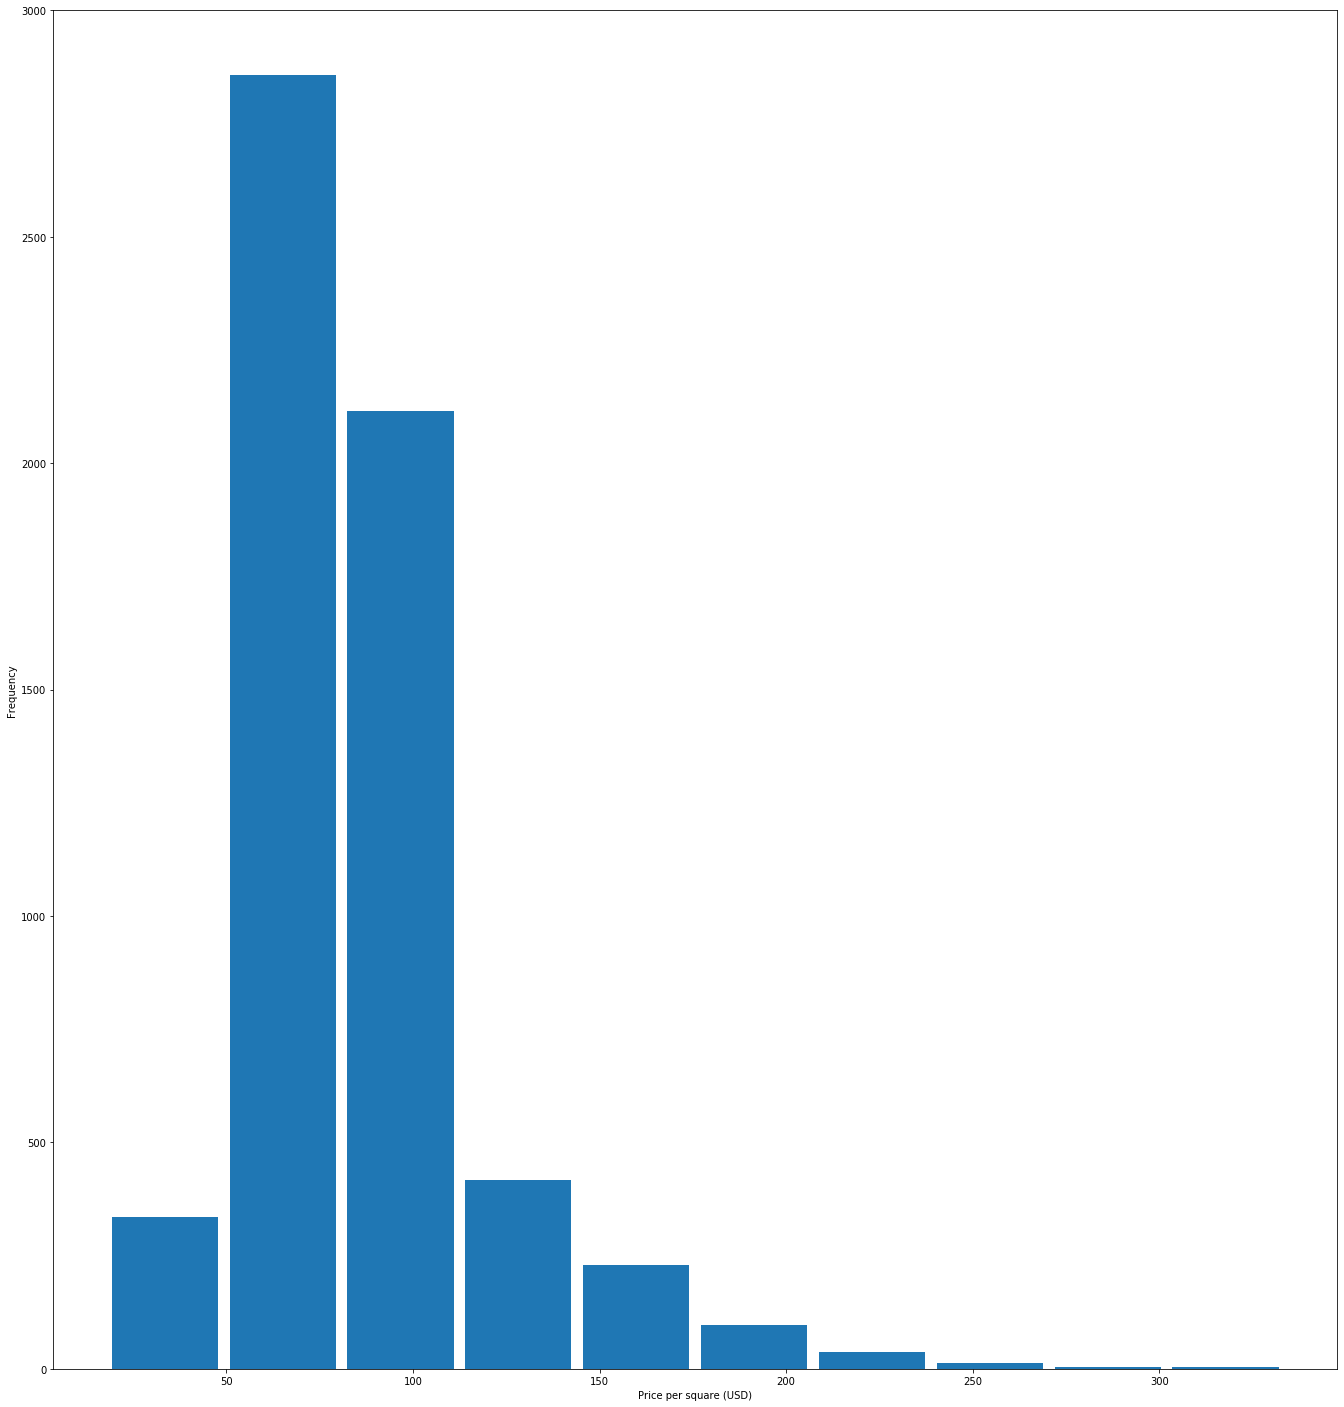

In [82]:
plt.figure(figsize = (23,25))
plt.hist(df_A.Price_Per_SqFt_USD, rwidth = 0.9)
plt.xlabel('Price per square (USD)')
plt.ylabel("Frequency")


In [83]:
# ----- C.4 [Remove Bathroom > Bedrooms +2] ----- #

In [84]:
# Online search reveals a trend that number of Bathrooms cannot
# be more than (#_of_Bedrooms + 2)

# Therefore, we will remove them

Text(0, 0.5, 'Frequency')

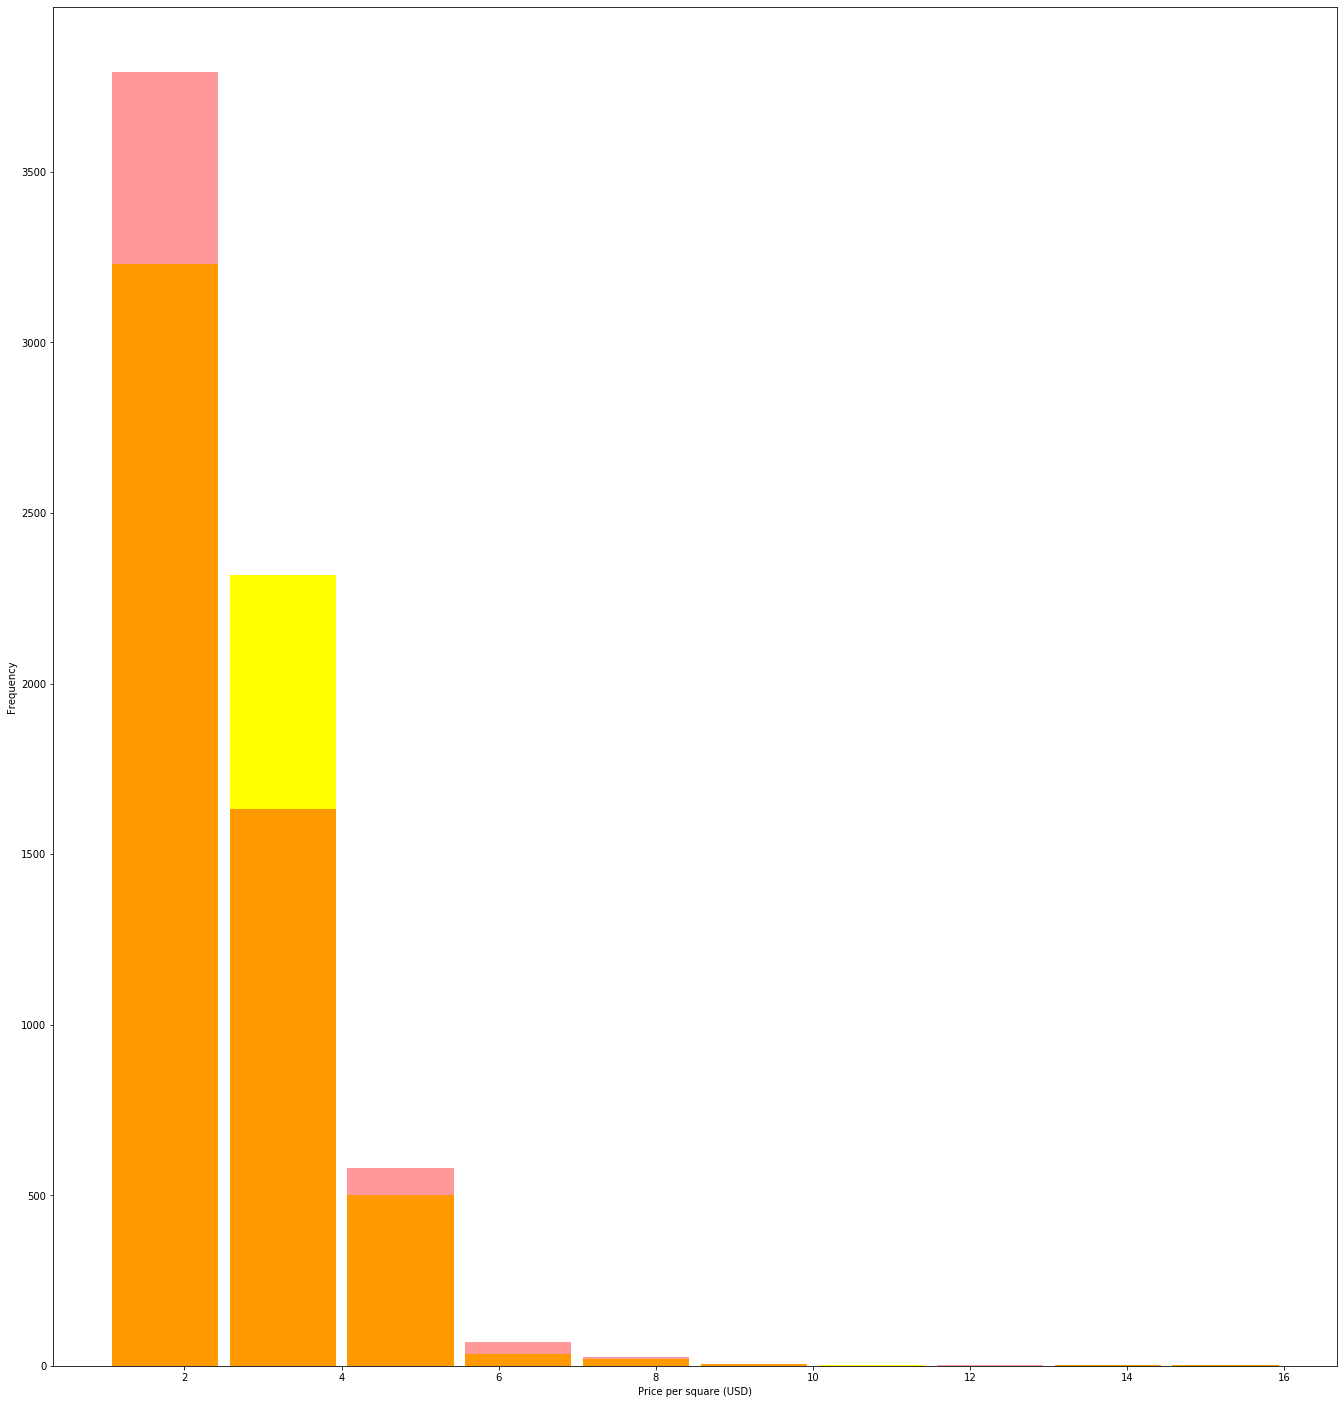

In [85]:
plt.figure(figsize = (23,25))
plt.hist(df_A.Bedrooms, rwidth = 0.9, color='yellow')
plt.hist(df_A.bath, rwidth = 0.9, color='red', alpha=0.4)
plt.xlabel('Price per square (USD)')
plt.ylabel("Frequency")

In [86]:
df_B = df_A[df_A.bath < (df_A.Bedrooms+2)]

In [87]:
df_B.shape

(6038, 7)

In [88]:
df_B

,location,bath,price,Bedrooms,Total_SqFt,Price_USD,Price_Per_SqFt_USD
0,1st Block Jayanagar,4.0,428.0,4,2850.0,582471.42,204.375937
2,1st Block Jayanagar,2.0,235.0,3,1875.0,319814.92,170.567957
4,1st Block Jayanagar,2.0,148.0,2,1235.0,201415.35,163.089352
5,1st Block Jayanagar,4.0,413.0,4,2750.0,562057.70,204.384618
6,1st Block Jayanagar,4.0,368.0,4,2450.0,500816.55,204.414918
...,...,...,...,...,...,...,...
9996,other,2.0,70.0,2,1200.0,95264.02,79.386683
9997,other,1.0,200.0,1,1800.0,272182.91,151.212728
10000,other,2.0,110.0,2,1353.0,149700.60,110.643459
10001,other,1.0,26.0,1,812.0,35383.78,43.576084


In [89]:
# ^ We have remoed disproportionate Bathroom > Bedroom

# Lets drop columns no longer needed in our model

In [90]:
df_B.drop(['price', 'Price_Per_SqFt_USD'], axis = 1, inplace = True)

/Users/sidx/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [91]:
df_B

,location,bath,Bedrooms,Total_SqFt,Price_USD
0,1st Block Jayanagar,4.0,4,2850.0,582471.42
2,1st Block Jayanagar,2.0,3,1875.0,319814.92
4,1st Block Jayanagar,2.0,2,1235.0,201415.35
5,1st Block Jayanagar,4.0,4,2750.0,562057.70
6,1st Block Jayanagar,4.0,4,2450.0,500816.55
...,...,...,...,...,...
9996,other,2.0,2,1200.0,95264.02
9997,other,1.0,1,1800.0,272182.91
10000,other,2.0,2,1353.0,149700.60
10001,other,1.0,1,812.0,35383.78


In [93]:
Data = df_B

# *******

# Our final data (Data) is ready to now build a model

In [94]:
Data.head(5)

,location,bath,Bedrooms,Total_SqFt,Price_USD
0,1st Block Jayanagar,4.0,4,2850.0,582471.42
2,1st Block Jayanagar,2.0,3,1875.0,319814.92
4,1st Block Jayanagar,2.0,2,1235.0,201415.35
5,1st Block Jayanagar,4.0,4,2750.0,562057.70
6,1st Block Jayanagar,4.0,4,2450.0,500816.55


In [95]:
# Apply One-Hot-Encoding to the Location column

In [96]:
Locations = pd.get_dummies(Data.location)

In [98]:
Locations

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [99]:
# In OneHotEncoding we drop one column

In [105]:
Locations.drop(['other'], axis = 1) 
#<-- Already executed!

In [103]:
Locations

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
data = pd.concat([Data, Locations], axis = 1)

In [107]:
data

,location,bath,Bedrooms,Total_SqFt,Price_USD,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4.0,4,2850.0,582471.42,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,2.0,3,1875.0,319814.92,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2.0,2,1235.0,201415.35,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,4.0,4,2750.0,562057.70,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,4.0,4,2450.0,500816.55,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,other,2.0,2,1200.0,95264.02,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,other,1.0,1,1800.0,272182.91,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000,other,2.0,2,1353.0,149700.60,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10001,other,1.0,1,812.0,35383.78,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
data = data.drop(['location'], axis = 1)

In [109]:
data

,bath,Bedrooms,Total_SqFt,Price_USD,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,4,2850.0,582471.42,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3,1875.0,319814.92,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2,1235.0,201415.35,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.0,4,2750.0,562057.70,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4.0,4,2450.0,500816.55,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2.0,2,1200.0,95264.02,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,1.0,1,1800.0,272182.91,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000,2.0,2,1353.0,149700.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10001,1.0,1,812.0,35383.78,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
X = data.drop(['Price_USD'], axis = 1)
Y = data.Price_USD

In [167]:
# Lets split our training and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

# Use Linear Regression as our starting model

In [150]:
model_LR = LinearRegression()
model_LR.fit(x_train, y_train)
model_LR.score(x_test, y_test)

0.7979951530771732

In [152]:
model_LR_A = LinearRegression(normalize = True)
model_LR_B = LinearRegression(normalize = False)

In [153]:
# We can randomly get samples
# We can cross_validate our model too

In [154]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

In [156]:
cv = ShuffleSplit(n_splits = 6, test_size = 0.2)
cross_val_score(model_LR_A, X, Y, cv = cv)

array([ 8.90426635e-01,  8.62629761e-01,  8.58708074e-01, -6.23845935e+23,
        8.68739446e-01,  8.06765180e-01])

In [157]:
cross_val_score(model_LR_B, X, Y, cv = cv)

array([0.79871774, 0.83451398, 0.80851668, 0.83247371, 0.87596539,
       0.85866536])

In [131]:
# It's reasonable to try various models:
# Since this is a project for price prediction
# We will try the following algorithms:
# 1. Lasso
# 2. Decision Tree

In [141]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [142]:
# --- --- 
# Lasso Regression

In [137]:
model_Lasso_1 = Lasso(alpha=1, selection='random')
model_Lasso_2 = Lasso(alpha=1, selection='cyclic')
model_Lasso_3 = Lasso(alpha=2, selection='random')
model_Lasso_4 = Lasso(alpha=2, selection='cyclic')
cross_val_score(model_Lasso_1, X, Y, cv = cv)

array([0.83778988, 0.78830861, 0.84875887, 0.84535458, 0.802842  ,
       0.87798377])

In [138]:
cross_val_score(model_Lasso_2, X, Y, cv = cv)

array([0.84439353, 0.83954358, 0.84325733, 0.81321666, 0.8509999 ,
       0.87486871])

In [139]:
cross_val_score(model_Lasso_3, X, Y, cv = cv)

array([0.85787534, 0.87504702, 0.86339153, 0.87078895, 0.79648333,
       0.80940301])

In [140]:
cross_val_score(model_Lasso_4, X, Y, cv = cv)

array([0.79628397, 0.86475216, 0.85221093, 0.80467983, 0.84047899,
       0.86080908])

In [143]:
# --- --- 
# Decision Tree Regression

In [145]:
model_DT_1 = DecisionTreeRegressor(criterion = 'mse', splitter = 'random')
model_DT_2 = DecisionTreeRegressor(criterion = 'mse', splitter = 'best')
model_DT_3 = DecisionTreeRegressor(criterion = 'friedman_mse', splitter = 'best')
model_DT_4 = DecisionTreeRegressor(criterion = 'friedman_mse', splitter = 'random')


In [146]:
cross_val_score(model_DT_1, X, Y, cv = cv)

array([0.74169516, 0.72975743, 0.67778195, 0.69901825, 0.79666762,
       0.77814236])

In [147]:
cross_val_score(model_DT_2, X, Y, cv = cv)

array([0.76735023, 0.73624152, 0.76832521, 0.50709196, 0.43799796,
       0.66236732])

In [148]:
cross_val_score(model_DT_3, X, Y, cv = cv)

array([0.76408344, 0.59485523, 0.7672066 , 0.69493137, 0.59487587,
       0.56799691])

In [149]:
cross_val_score(model_DT_4, X, Y, cv = cv)

array([0.43871967, 0.79653478, 0.70288056, 0.75593394, 0.57161838,
       0.71616534])

In [158]:
# ---- ----
# Clearly the weakest model is the DecisionTree Regressor
# of the 3.

# We can go with LinearRegression (normalize = False)

In [168]:
model_LR_B.fit(x_train, y_train)
model_LR_B.score(x_test, y_test)

0.8197052025372304

In [169]:
X

,bath,Bedrooms,Total_SqFt,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,4,2850.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3,1875.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2,1235.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.0,4,2750.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4.0,4,2450.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2.0,2,1200.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,1.0,1,1800.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000,2.0,2,1353.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10001,1.0,1,812.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
def Price_Predict(location, SqFt, Bath, Bed):
    
    location_index = np.where(X.columns == location)[0][0]
    
    size = len(X.columns)
    x = np.zeros(size)
    x[0] = Bath
    x[1] = Bed
    x[2] = SqFt
    x[location_index] = 1
    
    return model_LR_B.predict([x])[0]

In [187]:
(Price_Predict('1st Phase JP Nagar', 1000, 2, 2))

115143.9967982328

# We finally have our model
# Our final model is model_LR_B

In [183]:
# Let's export our model into a Pickle file
import pickle
with open('Price_prediction_banglore_homes_in_USD', 'wb') as L:
    pickle.dump(model_LR_B, L)

In [184]:
# We also need to save the column names:

Column_names = {
    'Columns' : [column_name.lower() for column_name in X.columns]
}

In [185]:
# Export Column_names in JSON file

In [186]:
import json

with open("Column_Names.json", 'w') as L:
    L.write(json.dumps(Column_names))